# Customer Segmentation and Prediction Using Machine Learning

This project analyzes an e-commerce dataset to segment customers based on purchasing behavior and predict delivery outcomes using machine learning. The objective is to uncover key customer patterns, identify factors influencing delivery performance, and support data-driven business decisions.

#### Dataset:
 e-commerce data containing customerID, orderID, Quantity, PriceRate and Other derieved metrics 



# Import Libraries

In [47]:
#importing required libraries

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Import Dataset

In [48]:
# importing dataset

Dataset = pd.read_csv(r"C:\Users\Asus\Desktop\BIA\Final BIA Project\Used_Dataset.csv" , encoding='latin1')

In [49]:
# Creating copy of original dataset

df = Dataset.copy()

# Data understanding

In [50]:
# Displaying first five rows of the dataset
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,InvoiceTime,UnitPrice,CustomerID,Country,CancelOrder,ValidTransaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,8:26:00 AM,2.55,17850.0,United Kingdom,0,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,8:26:00 AM,3.39,17850.0,United Kingdom,0,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,8:26:00 AM,2.75,17850.0,United Kingdom,0,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,8:26:00 AM,3.39,17850.0,United Kingdom,0,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,8:26:00 AM,3.39,17850.0,United Kingdom,0,1
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010,8:26:00 AM,7.65,17850.0,United Kingdom,0,1
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010,8:26:00 AM,4.25,17850.0,United Kingdom,0,1
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010,8:28:00 AM,1.85,17850.0,United Kingdom,0,1
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010,8:28:00 AM,1.85,17850.0,United Kingdom,0,1
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010,8:34:00 AM,1.69,13047.0,United Kingdom,0,1


In [51]:
# Getting information about the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         541909 non-null  object 
 1   StockCode         541909 non-null  object 
 2   Description       540455 non-null  object 
 3   Quantity          541909 non-null  int64  
 4   InvoiceDate       541909 non-null  object 
 5   InvoiceTime       541909 non-null  object 
 6   UnitPrice         541909 non-null  float64
 7   CustomerID        406829 non-null  float64
 8   Country           541909 non-null  object 
 9   CancelOrder       541909 non-null  int64  
 10  ValidTransaction  541909 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 45.5+ MB


,Quantity,UnitPrice,CustomerID,CancelOrder,ValidTransaction
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,0.017139,0.978216
std,218.081158,96.759853,1713.600303,0.129791,0.145978
min,-80995.000000,-11062.060000,12346.000000,0.000000,0.000000
25%,1.000000,1.250000,13953.000000,0.000000,1.000000
50%,3.000000,2.080000,15152.000000,0.000000,1.000000
75%,10.000000,4.130000,16791.000000,0.000000,1.000000
max,80995.000000,38970.000000,18287.000000,1.000000,1.000000


In [52]:
# Checking for missing values
df.isnull().sum()

InvoiceNo                0
StockCode                0
Description           1454
Quantity                 0
InvoiceDate              0
InvoiceTime              0
UnitPrice                0
CustomerID          135080
Country                  0
CancelOrder              0
ValidTransaction         0
dtype: int64

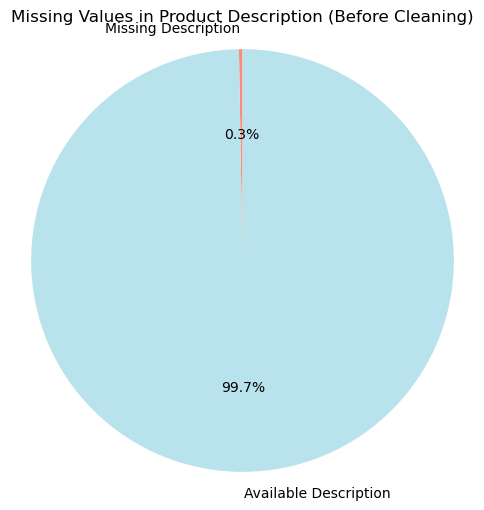

In [53]:
import matplotlib.pyplot as plt

# Count missing and non-missing Description values
missing_desc = df['Description'].isna().sum()
available_desc = df['Description'].notna().sum()

# Pie chart data
labels = ['Missing Description', 'Available Description']
sizes = [missing_desc, available_desc]
colors = ['#FF8A7A', '#B9E3EC']  # coral = missing, light blue = available

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Missing Values in Product Description (Before Cleaning)')
plt.axis('equal')
plt.show()


# Data Cleaning and Preprocessing

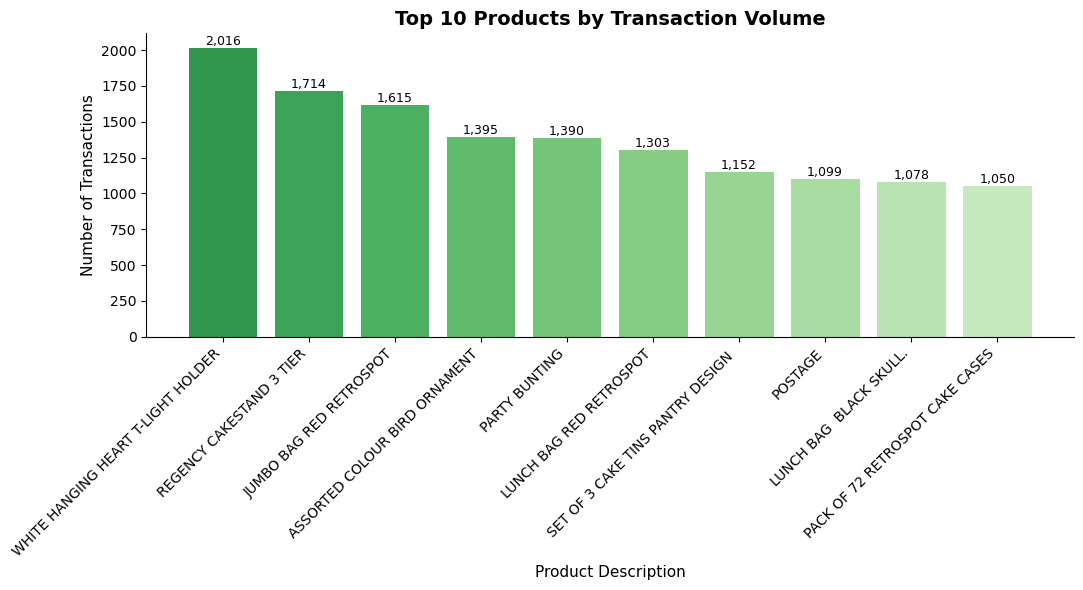

In [45]:


# Top 10 product descriptions
top_descriptions = df['Description'].value_counts().head(10)

# Lighter green gradient (dark → light, pastel tones)
colors = plt.cm.Greens(np.linspace(0.70, 0.25, len(top_descriptions)))

plt.figure(figsize=(11, 6))

bars = plt.bar(
    top_descriptions.index,
    top_descriptions.values,
    color=colors
)

# Titles & labels
plt.title('Top 10 Products by Transaction Volume', fontsize=14, weight='bold')
plt.xlabel('Product Description', fontsize=11)
plt.ylabel('Number of Transactions', fontsize=11)

# Axis formatting
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(bar.get_height()):,}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Clean professional look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [36]:
# Count duplicate rows
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)

Total duplicate rows: 5225


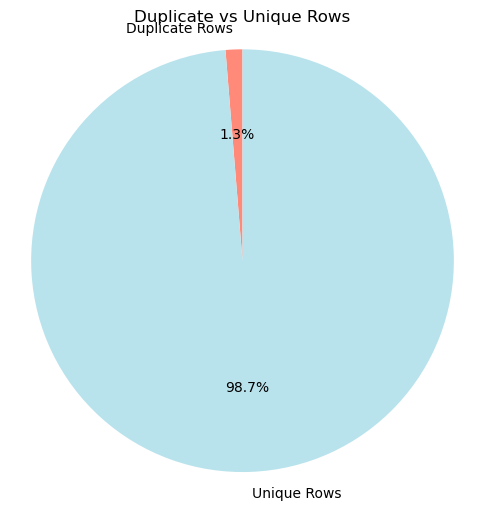

In [37]:
import matplotlib.pyplot as plt

# Count duplicate and unique rows
duplicates = df.duplicated().sum()
unique = len(df) - duplicates

# Pie chart data
labels = ['Duplicate Rows', 'Unique Rows']
sizes = [duplicates, unique]
colors = ['#FF8A7A', '#B9E3EC']  # coral for duplicates, light blue for unique

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Duplicate vs Unique Rows')
plt.axis('equal')
plt.show()


In [38]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [39]:
# Removing negative quantity
df = df[df['Quantity'] > 0]

In [103]:
# Convert columns to appropriate data types
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')
df['CustomerID'] = df['CustomerID'].astype(int)

In [22]:
# Create a 'Revenue' column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

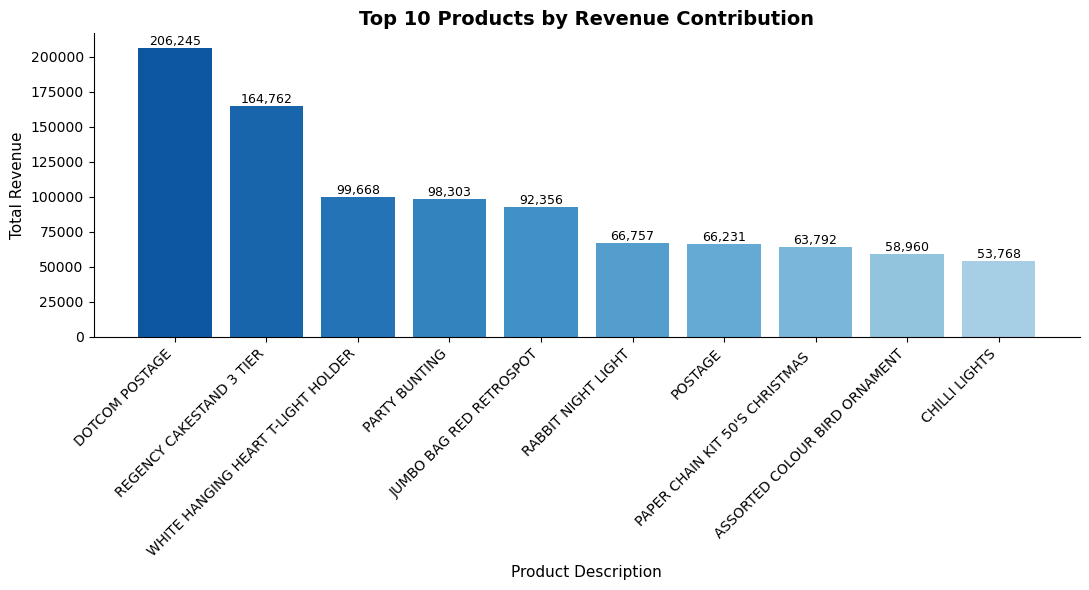

In [24]:


# Top 10 products by total revenue
top_revenue_products = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(11, 6))

# Reverse blue gradient (dark → light)
colors = plt.cm.Blues(np.linspace(0.85, 0.35, len(top_revenue_products)))

bars = plt.bar(
    top_revenue_products.index,
    top_revenue_products.values,
    color=colors
)

# Titles & labels
plt.title('Top 10 Products by Revenue Contribution', fontsize=14, weight='bold')
plt.xlabel('Product Description', fontsize=11)
plt.ylabel('Total Revenue', fontsize=11)

# Rotate x labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Value labels
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# RMF Method

In [105]:
# Set a 'snapshot_date' to calculate recency. This will be one day after the last transaction in the dataset.
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by CustomerID and calculate RFM values
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency: Days since last purchase
    'InvoiceNo': 'nunique',                                         # Frequency: Count of unique invoices
    'Revenue': 'sum'                                             # Monetary: Sum of all purchases
})

# Rename the columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'Revenue': 'MonetaryValue'}, inplace=True)

print("\nRFM DataFrame created successfully! Here are the first 5 rows:")
print(rfm.head())


RFM DataFrame created successfully! Here are the first 5 rows:
            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             3          7        4310.00
12348            76          4        1797.24
12349            19          1        1757.55
12350           311          1         334.40


Plotting RFM Distributions...


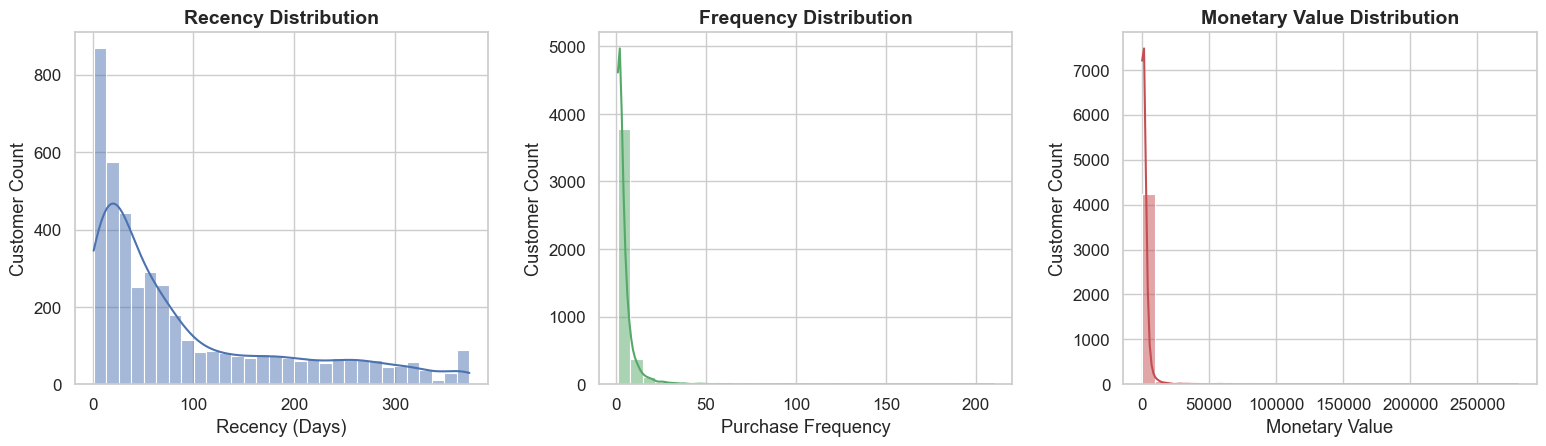

In [106]:
# --- Plotting RFM Distributions (Improved for Jupyter Notebook) ---

print("Plotting RFM Distributions...")

# Set a clean seaborn theme
sns.set_theme(
    style="whitegrid",
    context="notebook",
    font_scale=1.1
)

plt.figure(figsize=(16, 5))

# ---------------- Recency ----------------
plt.subplot(1, 3, 1)
sns.histplot(
    rfm['Recency'],
    bins=30,
    kde=True,
    color="#4C72B0",
    edgecolor="white"
)
plt.title("Recency Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Recency (Days)")
plt.ylabel("Customer Count")

# ---------------- Frequency ----------------
plt.subplot(1, 3, 2)
sns.histplot(
    rfm['Frequency'],
    bins=30,
    kde=True,
    color="#55A868",
    edgecolor="white"
)
plt.title("Frequency Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Purchase Frequency")
plt.ylabel("Customer Count")

# ---------------- Monetary Value ----------------
plt.subplot(1, 3, 3)
sns.histplot(
    rfm['MonetaryValue'],
    bins=30,
    kde=True,
    color="#C44E52",
    edgecolor="white"
)
plt.title("Monetary Value Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Monetary Value")
plt.ylabel("Customer Count")

plt.tight_layout(pad=2)
plt.show()

Plotting relationships between RFM variables...


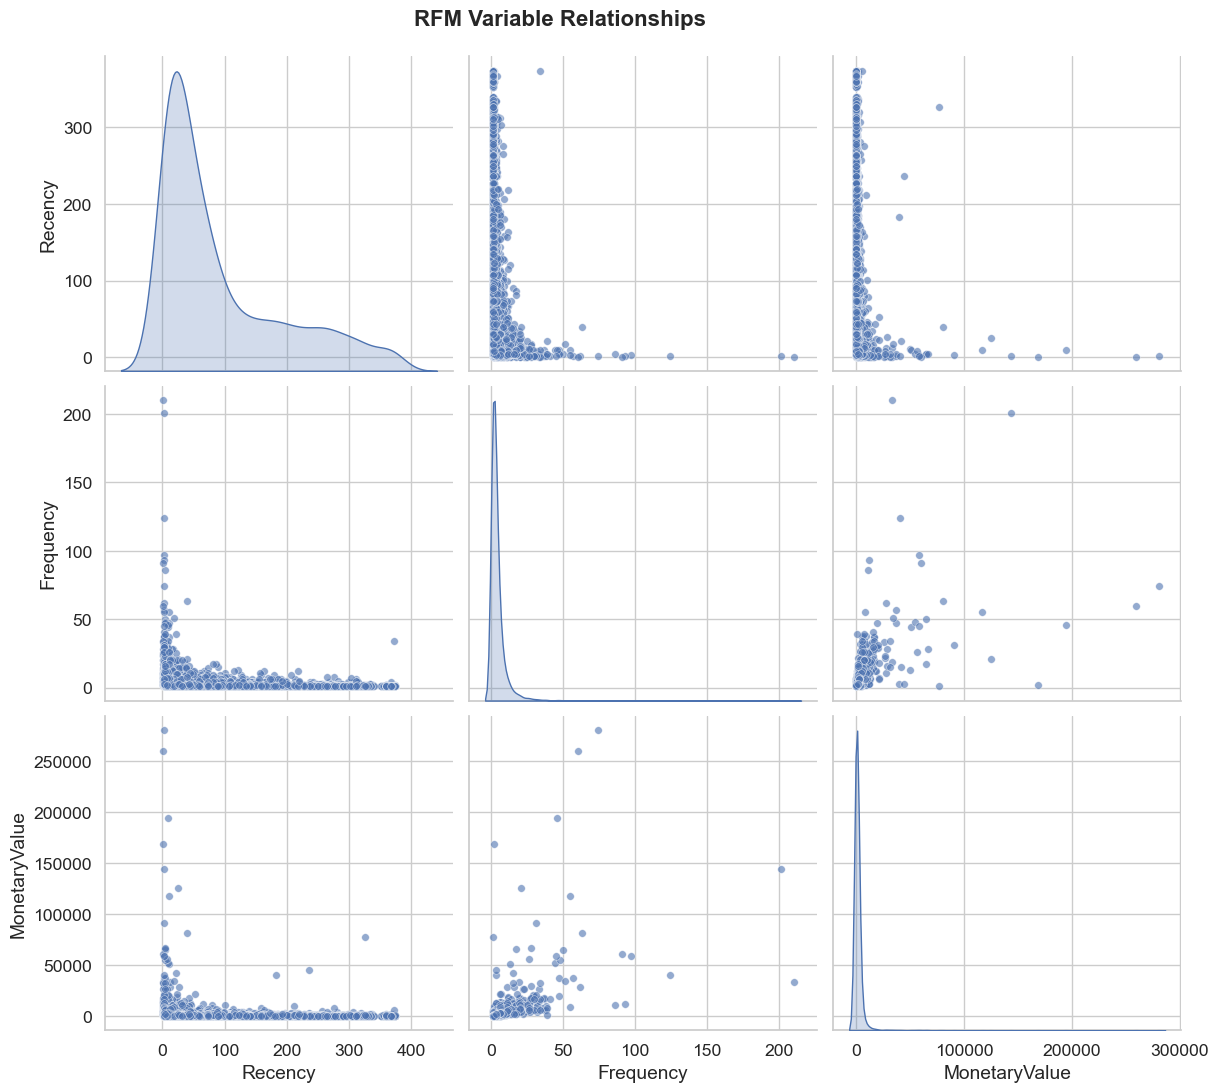

In [107]:
# --- Exploring Relationships between RFM variables (Clean & Attractive) ---

print("Plotting relationships between RFM variables...")

sns.set_theme(style="whitegrid", context="notebook", font_scale=1.15)

pairplot = sns.pairplot(
    rfm,
    diag_kind="kde",
    plot_kws={
        "alpha": 0.6,
        "s": 30,
        "edgecolor": "white"
    },
    diag_kws={
        "fill": True,
        "bw_adjust": 1.2
    }
)

pairplot.fig.set_size_inches(13, 11)
pairplot.fig.suptitle(
    "RFM Variable Relationships",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.show()


Correlation between RFM variables:


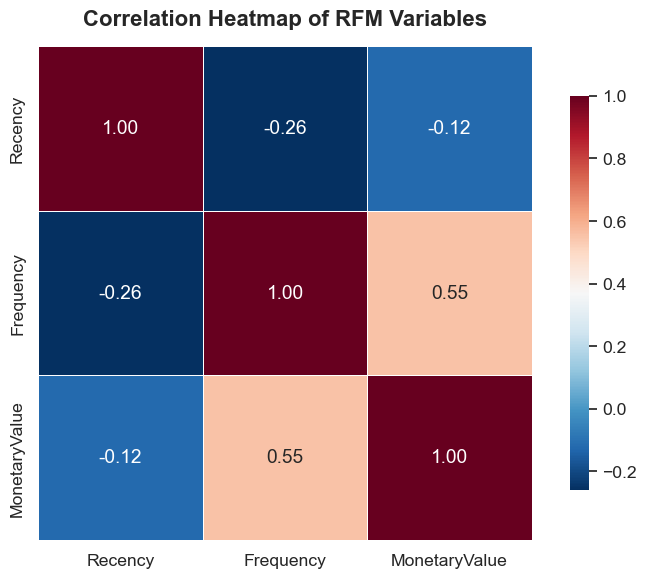

In [108]:
# --- Correlation Heatmap of RFM Variables (Clean & Attractive) ---

print("\nCorrelation between RFM variables:")

sns.set_theme(style="white", context="notebook", font_scale=1.15)

correlation_matrix = rfm.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    linewidths=0.5,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(
    "Correlation Heatmap of RFM Variables",
    fontsize=16,
    fontweight="bold",
    pad=15
)

plt.tight_layout()
plt.show()

In [109]:
# Address Skewness with Log Transformation

# Apply log transformation + 1 to each column(since the log of 0 is undefined)
rfm_log = rfm.apply(lambda x: np.log(x + 1))

print("RFM data has been log-transformed. Here's the first 5 rows:")
print(rfm_log.head())

RFM data has been log-transformed. Here's the first 5 rows:
             Recency  Frequency  MonetaryValue
CustomerID                                    
12346       5.789960   0.693147      11.253955
12347       1.386294   2.079442       8.368925
12348       4.343805   1.609438       7.494564
12349       2.995732   0.693147       7.472245
12350       5.743003   0.693147       5.815324


# RFM Scaling & Transformation

In [110]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the log-transformed data
rfm_scaled = scaler.fit_transform(rfm_log)

# The result is a NumPy array, so let's convert it back to a DataFrame for easier viewing
rfm_scaled = pd.DataFrame(rfm_scaled, index=rfm.index, columns=rfm.columns)

print("Scaled RFM data is ready. Here are the first 5 rows:")
print(rfm_scaled.head())

Scaled RFM data is ready. Here are the first 5 rows:
             Recency  Frequency  MonetaryValue
CustomerID                                    
12346       1.479129  -0.955013       3.697687
12347      -1.890519   1.074523       1.411820
12348       0.372543   0.386437       0.719046
12349      -0.658991  -0.955013       0.701362
12350       1.443198  -0.955013      -0.611449


# Clustering
## 1. K-Means Clustering

Generating Elbow plot...
Elbow plot has been generated and saved as 'elbow_plot.png'


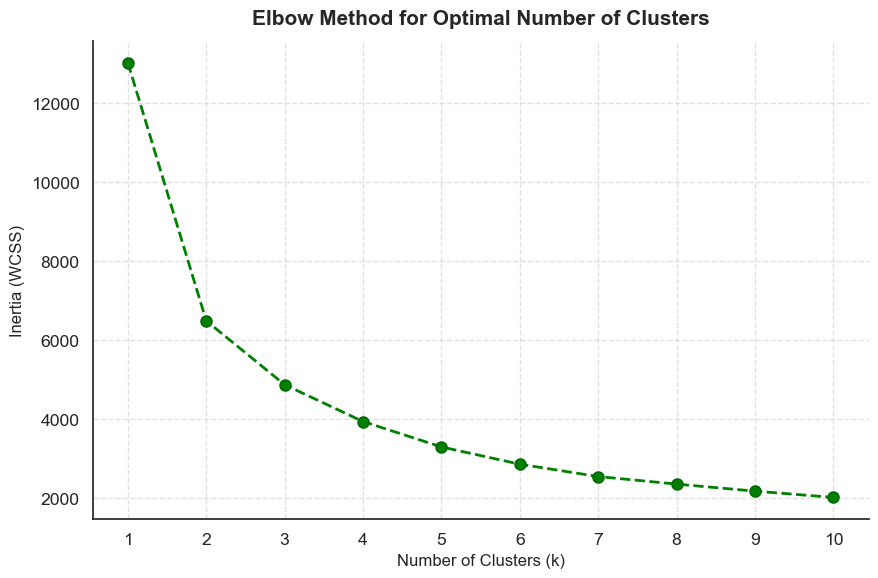

In [111]:
# Create an empty list to store the inertia values
inertia = []

# Loop through a range of k values
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

print("Generating Elbow plot...")


plt.figure(figsize=(9, 6))


plt.plot(
range(1, 11),
inertia,
marker='o',
linestyle='--',
linewidth=2,
markersize=8,
color='green', # line color
markerfacecolor='green',
markeredgecolor='darkgreen'
)


plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia (WCSS)", fontsize=12)
plt.title(
"Elbow Method for Optimal Number of Clusters",
fontsize=15,
fontweight="bold",
pad=12
)


plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', alpha=0.6)


# Clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.savefig("elbow_plot.png", dpi=300, bbox_inches="tight")
print("Elbow plot has been generated and saved as 'elbow_plot.png'")


plt.tight_layout()
plt.show()

In [112]:
# Choose the optimal k from the elbow plot
optimal_k = 4 

# Apply K-Means with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# Add the cluster labels back to the original rfm DataFrame
rfm['KMeans_Cluster'] = clusters

print(f"\nSuccessfully created {optimal_k} clusters!")
print("Here are the first 5 rows of the rfm DataFrame with the new 'Cluster' column:")
print(rfm.head())


Successfully created 4 clusters!
Here are the first 5 rows of the rfm DataFrame with the new 'Cluster' column:
            Recency  Frequency  MonetaryValue  KMeans_Cluster
CustomerID                                                   
12346           326          1       77183.60               2
12347             3          7        4310.00               1
12348            76          4        1797.24               2
12349            19          1        1757.55               0
12350           311          1         334.40               3


# 2.Hierarchical Clustering Visualization

Plotting enhanced dendrogram...


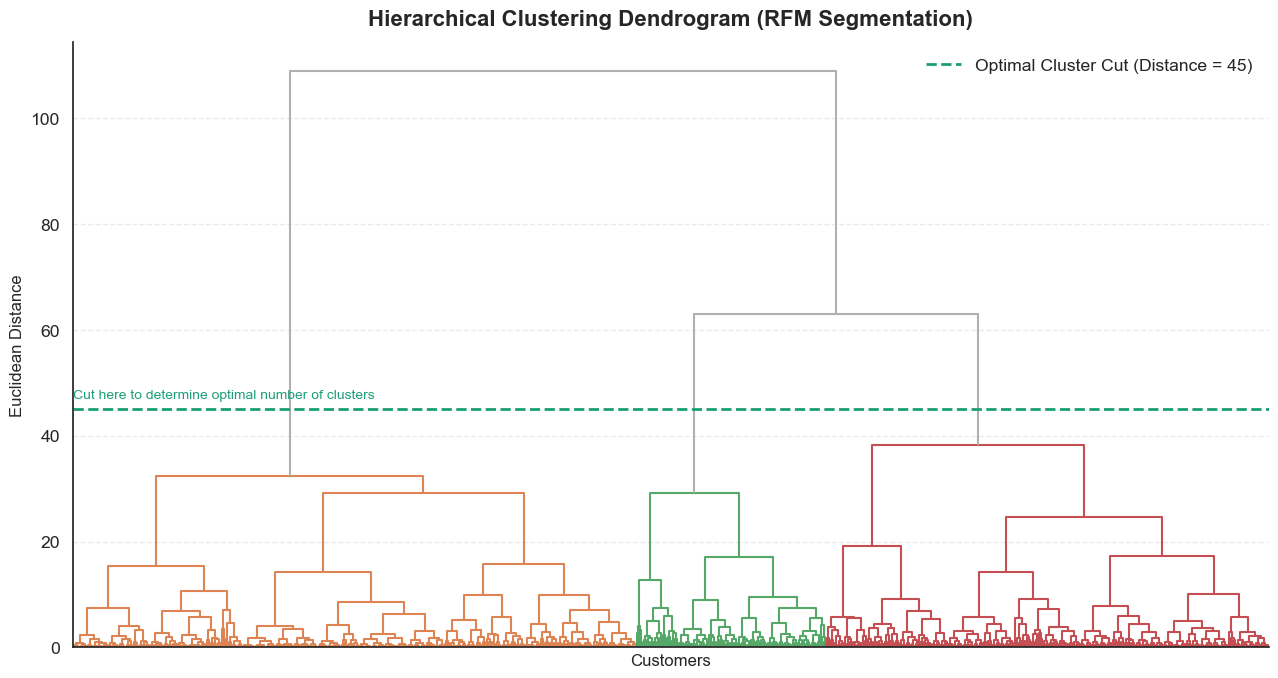

In [113]:
print("Plotting enhanced dendrogram...")


plt.figure(figsize=(13, 7))


# Dendrogram with improved coloring
sch.dendrogram(
sch.linkage(rfm_scaled, method="ward"),
no_labels=True, # avoids clutter
color_threshold=45, # cluster coloring below cut
above_threshold_color="#B0B0B0" # muted color above cut
)


# Cluster cut line
plt.axhline(
y=45,
color="#1B9E77", # teal-green (professional)
linestyle="--",
linewidth=2,
label="Optimal Cluster Cut (Distance = 45)"
)


plt.title(
"Hierarchical Clustering Dendrogram (RFM Segmentation)",
fontsize=16,
fontweight="bold",
pad=12
)
plt.xlabel("Customers", fontsize=12)
plt.ylabel("Euclidean Distance", fontsize=12)


# Annotation for interpretation
plt.text(
x=0.5,
y=47,
s="Cut here to determine optimal number of clusters",
fontsize=10,
color="#1B9E77"
)


# Clean & informative styling
plt.legend(frameon=False)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)


plt.tight_layout()
plt.show()

In [114]:
# Apply Hierarchical Clustering
# Based on the dendrogram, we can see 4 clusters is a good choice
hc = AgglomerativeClustering(n_clusters=4,  linkage='ward')
hc_clusters = hc.fit_predict(rfm_scaled)

# Add these cluster labels to a new column for comparison
rfm['HC_Cluster'] = hc_clusters

print("Hierarchical Clustering complete. 'HC_Cluster' column added.")
print(rfm.head())

Hierarchical Clustering complete. 'HC_Cluster' column added.
            Recency  Frequency  MonetaryValue  KMeans_Cluster  HC_Cluster
CustomerID                                                               
12346           326          1       77183.60               2           1
12347             3          7        4310.00               1           2
12348            76          4        1797.24               2           1
12349            19          1        1757.55               0           1
12350           311          1         334.40               3           0


# 3.Density-Based Spatial Clustering of Applications with Noise

In [115]:
# Apply DBSCAN
# Finding the right 'eps' and 'min_samples' can require some experimentation
dbscan = DBSCAN(eps=0.5, min_samples=5) # These are starting values; you may need to tune them
db_clusters = dbscan.fit_predict(rfm_scaled)

# Add these cluster labels to another new column
# Note: The '-1' label indicates an outlier identified by DBSCAN
rfm['DB_Cluster'] = db_clusters

print("\nDBSCAN Clustering complete. 'DB_Cluster' column added.")
print("Number of clusters found:", len(set(db_clusters)) - (1 if -1 in db_clusters else 0))
print("Number of outliers found:", list(db_clusters).count(-1))
print(rfm.head())


DBSCAN Clustering complete. 'DB_Cluster' column added.
Number of clusters found: 2
Number of outliers found: 63
            Recency  Frequency  MonetaryValue  KMeans_Cluster  HC_Cluster  \
CustomerID                                                                  
12346           326          1       77183.60               2           1   
12347             3          7        4310.00               1           2   
12348            76          4        1797.24               2           1   
12349            19          1        1757.55               0           1   
12350           311          1         334.40               3           0   

            DB_Cluster  
CustomerID              
12346               -1  
12347                0  
12348                0  
12349                1  
12350                1  


#### Evaluating and Selecting the Best Clustering Model Based on Silhouette Scores

In [116]:
# Create a dictionary to store the Silhouette Scores
scores = {}

In [117]:
# For K-Means Score
kmeans_score = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])
scores['K-Means'] = kmeans_score
print(f"Silhouette Score for K-Means: {kmeans_score:.4f}")

Silhouette Score for K-Means: 0.3354


In [118]:
# For Hierarchical Clustering Score
hc_score = silhouette_score(rfm_scaled, rfm['HC_Cluster'])
scores['Hierarchical'] = hc_score
print(f"Silhouette Score for Hierarchical Clustering: {hc_score:.4f}")

Silhouette Score for Hierarchical Clustering: 0.3066


In [119]:
# For DBSCAN Score
# Note: We must filter out outliers (label -1) for a meaningful score
db_filtered_data = rfm_scaled[rfm['DB_Cluster'] != -1]
db_filtered_labels = rfm['DB_Cluster'][rfm['DB_Cluster'] != -1]
# Only calculate score if more than one cluster was found
if len(set(db_filtered_labels)) > 1:
    db_score = silhouette_score(db_filtered_data, db_filtered_labels)
    scores['DBSCAN'] = db_score
    print(f"Silhouette Score for DBSCAN (excluding outliers): {db_score:.4f}")
else:
    print("DBSCAN found only one cluster or no clusters, Silhouette Score cannot be calculated.")
    scores['DBSCAN'] = 0.0

Silhouette Score for DBSCAN (excluding outliers): 0.2937


Comparing clustering algorithm performance...


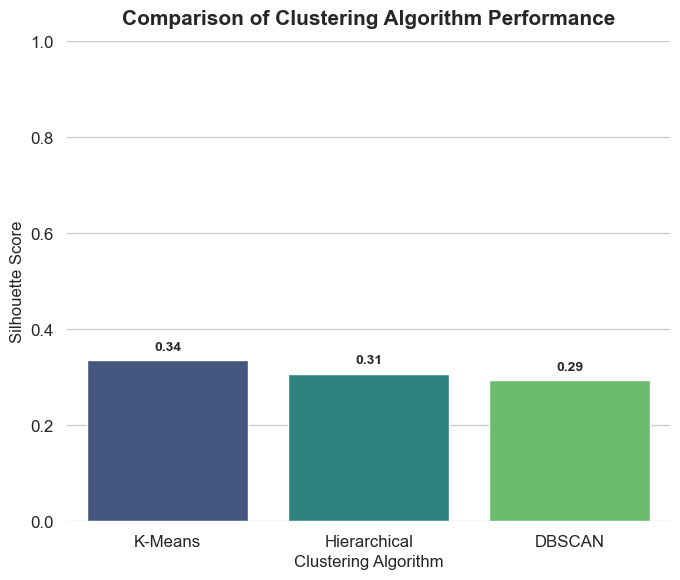

In [120]:
# Prepare dataframe
scores_df = (
    pd.DataFrame(list(scores.items()), columns=["Algorithm", "Silhouette Score"])
    .sort_values(by="Silhouette Score", ascending=False)
)

print("Comparing clustering algorithm performance...")

# Styling
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

plt.figure(figsize=(7, 6))

ax = sns.barplot(
    x="Algorithm",
    y="Silhouette Score",
    data=scores_df,
    palette="viridis"
)

# 🔑 FIX: Indentation starts here
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        xytext=(0, 5),
        textcoords="offset points"
    )

plt.title(
    "Comparison of Clustering Algorithm Performance",
    fontsize=15,
    fontweight="bold",
    pad=12
)
plt.xlabel("Clustering Algorithm", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)

plt.ylim(0, 1)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [121]:
# Choose K Means Clustering
rfm['Cluster'] = rfm['KMeans_Cluster']
rfm.drop(['KMeans_Cluster', 'HC_Cluster', 'DB_Cluster'], axis=1, inplace=True)

In [122]:
rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,2
12347,3,7,4310.00,1
12348,76,4,1797.24,2
12349,19,1,1757.55,0
12350,311,1,334.40,3


# Model Building

In [123]:
# Define features (X) and target (y) variables
# We use the original RFM values for better interpretability
X = rfm[['Recency', 'Frequency', 'MonetaryValue']]
y = rfm['Cluster']

print("Features (X) and Target (y) are defined.")
print("\nFirst 5 rows of Features (X):")
print(X.head())
print("\nFirst 5 rows of Target (y):")
print(y.head())

Features (X) and Target (y) are defined.

First 5 rows of Features (X):
            Recency  Frequency  MonetaryValue
CustomerID                                   
12346           326          1       77183.60
12347             3          7        4310.00
12348            76          4        1797.24
12349            19          1        1757.55
12350           311          1         334.40

First 5 rows of Target (y):
CustomerID
12346    2
12347    1
12348    2
12349    0
12350    3
Name: Cluster, dtype: int32


In [124]:
# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split successfully:")
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

Data split successfully:
Training set has 3471 samples.
Testing set has 868 samples.


# 1. Losigtic Regression

In [125]:
# Initialize the model (max_iter is increased to ensure convergence)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_lr = log_reg.predict(X_test)
# y_prob_lr = log_reg.predict_proba(X_test)[:, 1] # Probabilities for ROC curve

# 2.Decision Tree Classifier

In [127]:
# Initialize the model
dec_tree = DecisionTreeClassifier(random_state=42)
# Train the model
dec_tree.fit(X_train, y_train)
# Make predictions
y_pred_dt = dec_tree.predict(X_test)

Accuracy: 0.9343

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       146
           1       0.88      0.97      0.92       163
           2       0.95      0.86      0.90       248
           3       0.98      0.97      0.98       311

    accuracy                           0.93       868
   macro avg       0.92      0.94      0.93       868
weighted avg       0.94      0.93      0.93       868

Confusion Matrix:


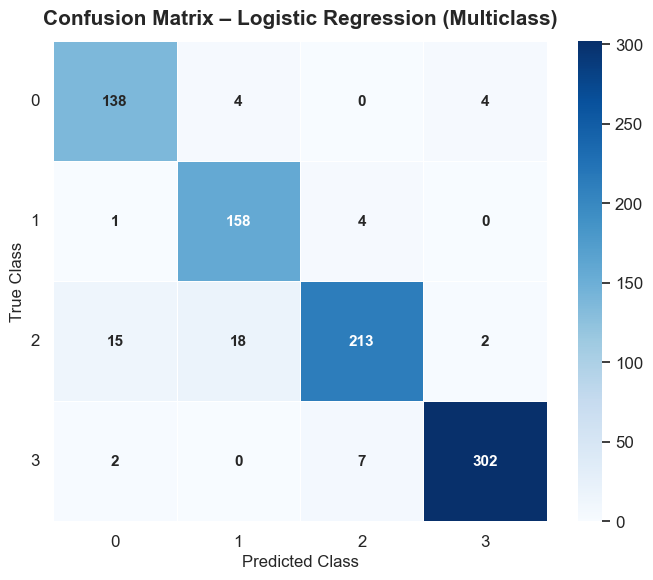

In [126]:
# ---- Metrics ----
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")


print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


# ---- Confusion Matrix ----
print("Confusion Matrix:")


cm_lr = confusion_matrix(y_test, y_pred_lr)
class_labels = sorted(y_test.unique()) # dynamically handles multiclass


sns.set_theme(style="white", context="notebook", font_scale=1.1)


plt.figure(figsize=(7, 6))


ax = sns.heatmap(
cm_lr,
annot=True,
fmt="d",
cmap="Blues",
cbar=True,
linewidths=0.5,
linecolor="white",
annot_kws={"size": 11, "weight": "bold"}
)


plt.title(
"Confusion Matrix – Logistic Regression (Multiclass)",
fontsize=15,
fontweight="bold",
pad=12
)


plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)


# Correct number of labels
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels, rotation=0)


plt.tight_layout()
plt.show()

Accuracy: 0.9700

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       146
           1       0.96      0.98      0.97       163
           2       0.95      0.97      0.96       248
           3       0.99      0.98      0.98       311

    accuracy                           0.97       868
   macro avg       0.97      0.97      0.97       868
weighted avg       0.97      0.97      0.97       868

Confusion Matrix:


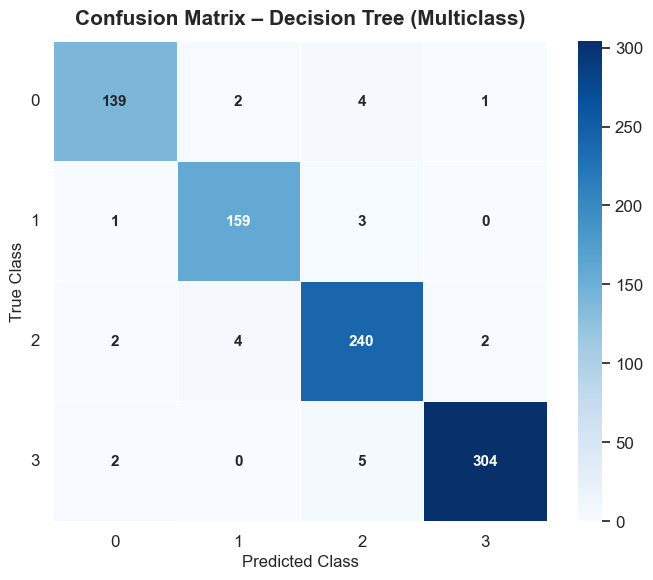

In [128]:
# ---- Metrics ----
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# ---- Confusion Matrix ----
print("Confusion Matrix:")

cm_dt = confusion_matrix(y_test, y_pred_dt)
class_labels = sorted(y_test.unique())

sns.set_theme(style="white", context="notebook", font_scale=1.1)

plt.figure(figsize=(7, 6))

ax = sns.heatmap(
    cm_dt,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"size": 11, "weight": "bold"}
)

plt.title(
    "Confusion Matrix – Decision Tree (Multiclass)",
    fontsize=15,
    fontweight="bold",
    pad=12
)

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)

ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels, rotation=0)

plt.tight_layout()
plt.show()

# 3.Random Forest

In [129]:
# Initialize the model
rand_forest = RandomForestClassifier(random_state=42)
# Train the model
rand_forest.fit(X_train, y_train)
# Make predictions
y_pred_rf = rand_forest.predict(X_test)

Accuracy: 0.9827

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      1.00      0.99       163
           2       0.98      0.97      0.98       248
           3       0.99      0.98      0.99       311

    accuracy                           0.98       868
   macro avg       0.98      0.98      0.98       868
weighted avg       0.98      0.98      0.98       868

Confusion Matrix:


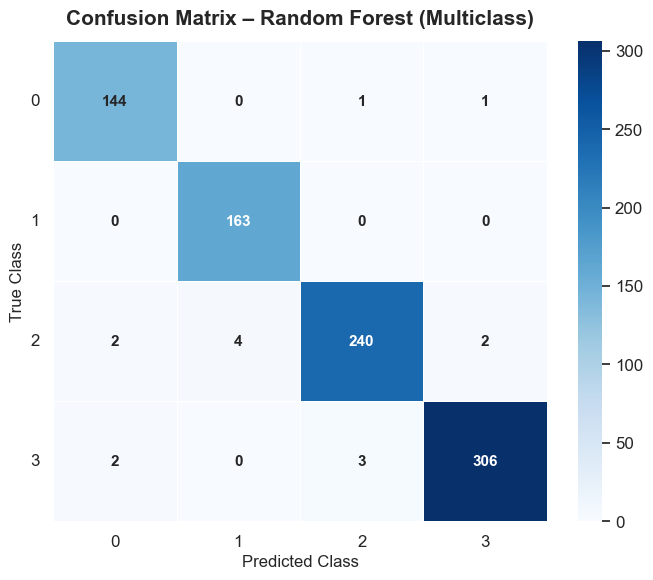

In [130]:
# ---- Metrics ----
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# ---- Confusion Matrix ----
print("Confusion Matrix:")

cm_rf = confusion_matrix(y_test, y_pred_rf)
class_labels = sorted(y_test.unique())

sns.set_theme(style="white", context="notebook", font_scale=1.1)

plt.figure(figsize=(7, 6))

ax = sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"size": 11, "weight": "bold"}
)

plt.title(
    "Confusion Matrix – Random Forest (Multiclass)",
    fontsize=15,
    fontweight="bold",
    pad=12
)

plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)

ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels, rotation=0)

plt.tight_layout()
plt.show()

#### Selecting the Best Model Using K-Fold Cross-Validation

In [131]:
# create a variable consisting of all models
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "Random Forest": rand_forest
}

In [132]:
# --- Perform 10-Fold Cross-Validation ---
# Set up the cross-validation strategy
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# --- Store Results ---
results = []
names = []

for name, model in models.items():
    print(f"--- {name} ---")
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_scores)
    names.append(name)
    
    # Print the results
    print(f"Scores for each fold: {np.round(cv_scores, 4)}")
    print(f"Mean Accuracy: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}\n")


--- Logistic Regression ---
Scores for each fold: [0.9608 0.9263 0.924  0.9562 0.9401 0.9378 0.9631 0.9585 0.9539 0.9607]
Mean Accuracy: 0.9481
Standard Deviation: 0.0141

--- Decision Tree ---
Scores for each fold: [0.9724 0.9654 0.97   0.9562 0.9447 0.9654 0.9516 0.9562 0.9724 0.9561]
Mean Accuracy: 0.9610
Standard Deviation: 0.0090

--- Random Forest ---
Scores for each fold: [0.977  0.9793 0.9654 0.9839 0.9677 0.9839 0.9816 0.97   0.9885 0.9792]
Mean Accuracy: 0.9776
Standard Deviation: 0.0072



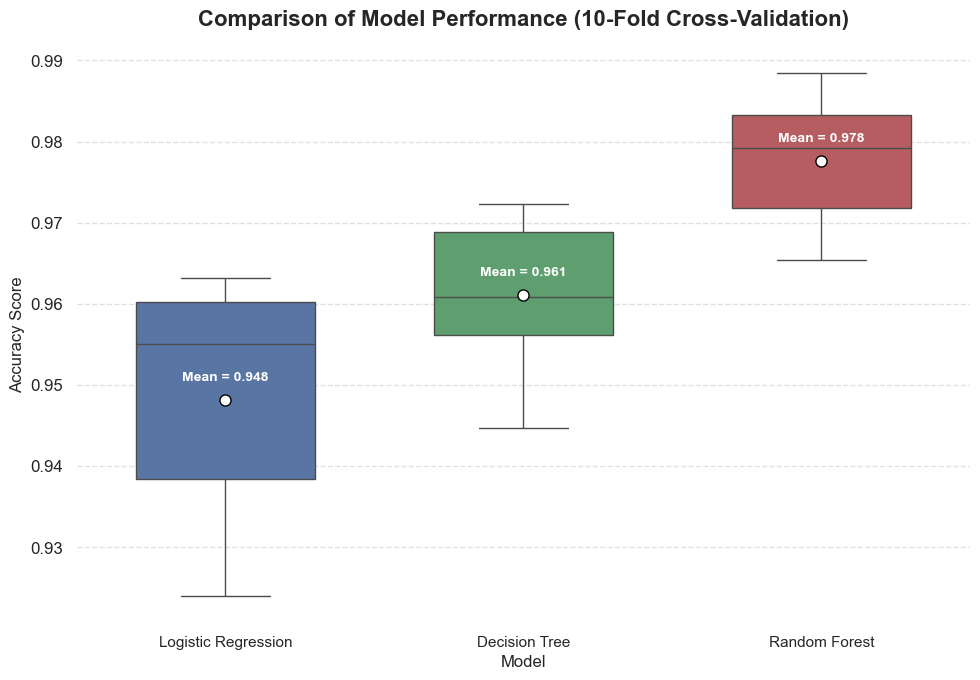

In [133]:
# --- Model Performance Comparison (10-Fold CV) – Clean & Informative Box Plot ---
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

plt.figure(figsize=(10, 7))

ax = sns.boxplot(
    data=results,
    palette=["#4C72B0", "#55A868", "#C44E52"],  # Blue, Green, Red
    width=0.6,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 8
    }
)

# X-axis labels
ax.set_xticklabels(names, fontsize=11)

# Titles & labels
plt.title(
    "Comparison of Model Performance (10-Fold Cross-Validation)",
    fontsize=16,
    fontweight="bold",
    pad=15
)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Grid styling
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Annotate mean accuracy (WHITE text)
for i, model_scores in enumerate(results):
    mean_score = np.mean(model_scores)
    plt.text(
        i,
        mean_score + 0.002,
        f"Mean = {mean_score:.3f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="white"
    )

# Clean look
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()